In [169]:
# Helper libraries
import datetime
from packaging import version
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras import models
from tensorflow.keras import layers

from collections import Counter
import numpy as np
import pandas as pd
import keras
from keras import regularizers
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import time

#from plot_keras_history import plot_history
# To get consistint results each time we rerun the code.
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [127]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [128]:
print('train_images:\t{}'.format(x_train.shape))
print('train_labels:\t{}'.format(y_train.shape))
print('test_images:\t\t{}'.format(x_test.shape))
print('test_labels:\t\t{}'.format(y_test.shape))

train_images:	(50000, 32, 32, 3)
train_labels:	(50000, 1)
test_images:		(10000, 32, 32, 3)
test_labels:		(10000, 1)


In [129]:
def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [130]:
x_preview, y_preview = get_three_classes(x_train, y_train)
x_preview, y_preview = get_three_classes(x_test, y_test)

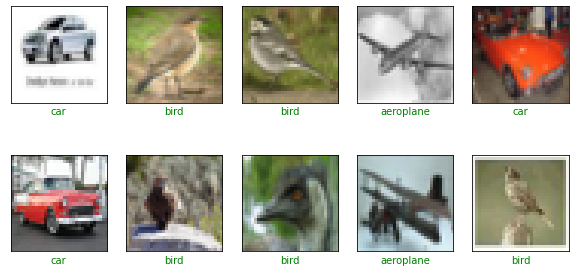

In [131]:
class_names_preview = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_preview, y_preview, y_preview)

In [132]:
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

In [133]:
x_train_norm = x_train.astype('float32')/255.
x_test_norm = x_test.astype('float32')/255.

In [134]:
#y_train_encoded = to_categorical(y_train)
#y_test_encoded = to_categorical(y_test)

In [135]:
x_train_norm.shape, x_test_norm.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [136]:
x_val_norm, x_train_norm = x_train_norm[:3000], x_train_norm[3000:] 
y_val, y_train = y_train[:3000], y_train[3000:]

In [137]:
x_val_norm.shape, y_val.shape

((3000, 32, 32, 3), (3000, 1))

In [138]:
x_train_norm.shape, y_train.shape

((47000, 32, 32, 3), (47000, 1))

### Experiment 1 - DNN with 2 hidden layers

In [175]:
model1 = models.Sequential()
model1.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=(32,32,3)))
model1.add(tf.keras.layers.Dense(units=6, activation='relu',input_shape=(32,32,3)))
model1.add(layers.Flatten())
model1.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [176]:
model1.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

In [177]:
program_start1 = time.time()
history1 = model1.fit(x_train_norm, y_train, epochs=30, batch_size = 100,
                      callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],   
                    validation_data=(x_val_norm, y_val))
program_end1 = time.time()
print('Total time taken to run model 1 is {} minutes.'.format(round(program_end1 - program_start1)/60, 2)) 

Epoch 1/30
470/470 [==============================] - 4s 8ms/step - loss: 1.9222 - accuracy: 0.3133 - val_loss: 1.6886 - val_accuracy: 0.4067
Epoch 2/30
470/470 [==============================] - 3s 7ms/step - loss: 1.6630 - accuracy: 0.4251 - val_loss: 1.6197 - val_accuracy: 0.4213
Epoch 3/30
470/470 [==============================] - 3s 7ms/step - loss: 1.5994 - accuracy: 0.4423 - val_loss: 1.5943 - val_accuracy: 0.4447
Epoch 4/30
470/470 [==============================] - 4s 7ms/step - loss: 1.5719 - accuracy: 0.4560 - val_loss: 1.5699 - val_accuracy: 0.4630
Epoch 5/30
470/470 [==============================] - 4s 7ms/step - loss: 1.5458 - accuracy: 0.4659 - val_loss: 1.5430 - val_accuracy: 0.4713
Epoch 6/30
470/470 [==============================] - 3s 7ms/step - loss: 1.5230 - accuracy: 0.4752 - val_loss: 1.5484 - val_accuracy: 0.4667
Epoch 7/30
470/470 [==============================] - 3s 7ms/step - loss: 1.5056 - accuracy: 0.4823 - val_loss: 1.5351 - val_accuracy: 0.4653
Epoch 

### Experiment 2 - DNN with 3 hidden layers

In [179]:
model2 = models.Sequential()
model2.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=(32,32,3)))
model2.add(tf.keras.layers.Dense(units=12, activation='relu',input_shape=(32,32,3)))
model2.add(tf.keras.layers.Dense(units=12, activation='relu',input_shape=(32,32,3)))
model2.add(layers.Flatten())
model2.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [180]:
model2.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

In [181]:
program_start2 = time.time()
history2 = model2.fit(x_train_norm, y_train, epochs=30, batch_size = 100,
                      callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],   
                    validation_data=(x_val_norm, y_val))
program_end2 = time.time()
print('Total time taken to run model 2 is {} minutes.'.format(round(program_end2 - program_start2)/60, 2)) 

Epoch 1/30
470/470 [==============================] - 8s 17ms/step - loss: 1.8856 - accuracy: 0.3319 - val_loss: 1.5923 - val_accuracy: 0.4380
Epoch 2/30
470/470 [==============================] - 8s 17ms/step - loss: 1.5895 - accuracy: 0.4462 - val_loss: 1.5218 - val_accuracy: 0.4663
Epoch 3/30
470/470 [==============================] - 8s 17ms/step - loss: 1.5191 - accuracy: 0.4702 - val_loss: 1.4893 - val_accuracy: 0.4840
Epoch 4/30
470/470 [==============================] - 9s 18ms/step - loss: 1.4857 - accuracy: 0.4851 - val_loss: 1.4815 - val_accuracy: 0.4940
Epoch 5/30
470/470 [==============================] - 8s 18ms/step - loss: 1.4555 - accuracy: 0.4985 - val_loss: 1.4663 - val_accuracy: 0.4887
Epoch 6/30
470/470 [==============================] - 8s 17ms/step - loss: 1.4227 - accuracy: 0.5104 - val_loss: 1.4697 - val_accuracy: 0.4850
Epoch 7/30
470/470 [==============================] - 8s 17ms/step - loss: 1.4033 - accuracy: 0.5175 - val_loss: 1.4767 - val_accuracy: 0.4727

### Experiment 3 - CNN with 2 max pooling layers

In [200]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model3.add(layers.MaxPool2D((2, 2),strides=2))
model3.add(layers.Dropout(0.3))
model3.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model3.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model3.add(layers.Dropout(0.3))
model3.add(layers.Flatten())
model3.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [201]:
model3.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

In [202]:
program_start3 = time.time()
history3 = model3.fit(x_train_norm, y_train, epochs=30, batch_size = 100,
                      callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],   
                    validation_data=(x_val_norm, y_val))
program_end3 = time.time()
print('Total time taken to run model 3 is {} minutes.'.format(round(program_end3 - program_start3)/60, 2)) 

Epoch 1/30
470/470 [==============================] - 87s 184ms/step - loss: 1.7389 - accuracy: 0.3692 - val_loss: 1.1443 - val_accuracy: 0.6037
Epoch 2/30
470/470 [==============================] - 77s 164ms/step - loss: 1.1685 - accuracy: 0.5917 - val_loss: 1.0303 - val_accuracy: 0.6567
Epoch 3/30
470/470 [==============================] - 78s 165ms/step - loss: 1.0144 - accuracy: 0.6494 - val_loss: 0.9386 - val_accuracy: 0.6810
Epoch 4/30
470/470 [==============================] - 76s 161ms/step - loss: 0.9253 - accuracy: 0.6783 - val_loss: 0.8664 - val_accuracy: 0.7000
Epoch 5/30
470/470 [==============================] - 77s 163ms/step - loss: 0.8519 - accuracy: 0.7057 - val_loss: 0.8371 - val_accuracy: 0.7097
Epoch 6/30
470/470 [==============================] - 80s 171ms/step - loss: 0.8017 - accuracy: 0.7220 - val_loss: 0.8036 - val_accuracy: 0.7220
Epoch 7/30
470/470 [==============================] - 77s 164ms/step - loss: 0.7573 - accuracy: 0.7421 - val_loss: 0.7630 - val_ac

### Experiment 4 - CNN with 3 max pooling layers

In [185]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model4.add(layers.MaxPool2D((2, 2),strides=2))
model4.add(layers.Dropout(0.3))
model4.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4.add(layers.Dropout(0.3))
model4.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4.add(layers.Dropout(0.3))
model4.add(layers.Flatten())
model4.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [186]:
model4.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

In [187]:
program_start4 = time.time()
history4 = model4.fit(x_train_norm, y_train, epochs=30, batch_size = 100,
                      callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],   
                    validation_data=(x_val_norm, y_val))
program_end4 = time.time()
print('Total time taken to run model 4 is {} minutes.'.format(round(program_end4 - program_start4)/60, 2)) 

Epoch 1/30
470/470 [==============================] - 213s 452ms/step - loss: 1.8473 - accuracy: 0.3165 - val_loss: 1.2164 - val_accuracy: 0.5733
Epoch 2/30
470/470 [==============================] - 214s 456ms/step - loss: 1.2261 - accuracy: 0.5655 - val_loss: 1.0109 - val_accuracy: 0.6547
Epoch 3/30
470/470 [==============================] - 213s 453ms/step - loss: 1.0573 - accuracy: 0.6309 - val_loss: 0.9878 - val_accuracy: 0.6603
Epoch 4/30
470/470 [==============================] - 213s 454ms/step - loss: 0.9507 - accuracy: 0.6677 - val_loss: 0.8112 - val_accuracy: 0.7323
Epoch 5/30
470/470 [==============================] - 187s 398ms/step - loss: 0.8631 - accuracy: 0.7002 - val_loss: 0.7818 - val_accuracy: 0.7327
Epoch 6/30
470/470 [==============================] - 165s 352ms/step - loss: 0.7847 - accuracy: 0.7297 - val_loss: 0.7368 - val_accuracy: 0.7470
Epoch 7/30
470/470 [==============================] - 170s 362ms/step - loss: 0.7285 - accuracy: 0.7476 - val_loss: 0.7086 -

### Experiment 5+ - Redo all experiments with regularization

In [188]:
model1_reg = models.Sequential()
model1_reg.add(layers.Dense(units=6, activation='relu',input_shape=(32,32,3)))
model1_reg.add(layers.Dense(units=6, activation='relu',input_shape=(32,32,3)))
model1_reg.add(layers.Flatten())
model1_reg.add(layers.Dense(units=384, activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model1_reg.add(layers.Dense(units=10, activation='softmax'))

model1_reg.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

program_start1_reg = time.time()
history1_reg = model1_reg.fit(x_train_norm, y_train, epochs=30, batch_size = 100,
                              callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],   
                    validation_data=(x_val_norm, y_val))
program_end1_reg = time.time()
print('Total time taken to run model 1 with regularization is {} minutes.'
      .format(round(program_end1_reg - program_start1_reg)/60, 2)) 

Epoch 1/30
470/470 [==============================] - 14s 28ms/step - loss: 2.1546 - accuracy: 0.3152 - val_loss: 1.7402 - val_accuracy: 0.4253
Epoch 2/30
470/470 [==============================] - 13s 28ms/step - loss: 1.7325 - accuracy: 0.4174 - val_loss: 1.6404 - val_accuracy: 0.4580
Epoch 3/30
470/470 [==============================] - 13s 28ms/step - loss: 1.6415 - accuracy: 0.4502 - val_loss: 1.5853 - val_accuracy: 0.4713
Epoch 4/30
470/470 [==============================] - 14s 29ms/step - loss: 1.6141 - accuracy: 0.4604 - val_loss: 1.5696 - val_accuracy: 0.4730
Epoch 5/30
470/470 [==============================] - 13s 29ms/step - loss: 1.5821 - accuracy: 0.4779 - val_loss: 1.5500 - val_accuracy: 0.4840
Epoch 6/30
470/470 [==============================] - 13s 28ms/step - loss: 1.5676 - accuracy: 0.4833 - val_loss: 1.5238 - val_accuracy: 0.4973
Epoch 7/30
470/470 [==============================] - 13s 29ms/step - loss: 1.5371 - accuracy: 0.4969 - val_loss: 1.5234 - val_accuracy:

In [189]:
model2_reg = models.Sequential()
model2_reg.add(layers.Dense(units=12, activation='relu',input_shape=(32,32,3)))
model2_reg.add(layers.Dense(units=12, activation='relu',input_shape=(32,32,3)))
model2_reg.add(layers.Dense(units=12, activation='relu',input_shape=(32,32,3)))
model2_reg.add(layers.Flatten())
model2_reg.add(layers.Dense(units=384, activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model2_reg.add(layers.Dense(units=10, activation='softmax'))

model2_reg.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

program_start2_reg = time.time()
history2_reg = model2_reg.fit(x_train_norm, y_train, epochs=30, batch_size = 100,
                              callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],   
                    validation_data=(x_val_norm, y_val))
program_end2_reg = time.time()
print('Total time taken to run model 2 with regularization is {} minutes.'
      .format(round(program_end2_reg - program_start2_reg)/60, 2)) 

Epoch 1/30
470/470 [==============================] - 33s 68ms/step - loss: 2.1085 - accuracy: 0.2822 - val_loss: 1.8102 - val_accuracy: 0.3937
Epoch 2/30
470/470 [==============================] - 31s 66ms/step - loss: 1.8206 - accuracy: 0.3859 - val_loss: 1.7201 - val_accuracy: 0.4400
Epoch 3/30
470/470 [==============================] - 33s 69ms/step - loss: 1.7057 - accuracy: 0.4306 - val_loss: 1.6310 - val_accuracy: 0.4667
Epoch 4/30
470/470 [==============================] - 33s 69ms/step - loss: 1.6580 - accuracy: 0.4565 - val_loss: 1.6282 - val_accuracy: 0.4607
Epoch 5/30
470/470 [==============================] - 32s 67ms/step - loss: 1.6176 - accuracy: 0.4732 - val_loss: 1.5965 - val_accuracy: 0.4877
Epoch 6/30
470/470 [==============================] - 31s 67ms/step - loss: 1.5848 - accuracy: 0.4887 - val_loss: 1.5396 - val_accuracy: 0.5040
Epoch 7/30
470/470 [==============================] - 31s 66ms/step - loss: 1.5430 - accuracy: 0.5012 - val_loss: 1.5363 - val_accuracy:

In [203]:
model3_reg = models.Sequential()
model3_reg.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model3_reg.add(layers.MaxPool2D((2, 2),strides=2))
model3_reg.add(layers.Dropout(0.3))
model3_reg.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model3_reg.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model3_reg.add(layers.Dropout(0.3))
model3_reg.add(layers.Flatten())
model3_reg.add(layers.Dense(units=384, activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model3_reg.add(layers.Dense(units=10, activation=tf.nn.softmax))

model3_reg.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

program_start3_reg = time.time()
history3_reg = model3_reg.fit(x_train_norm, y_train, epochs=30, batch_size = 100,
                      callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],   
                    validation_data=(x_val_norm, y_val))
program_end3_reg = time.time()
print('Total time taken to run model 3 with regularization is {} minutes.'
      .format(round(program_end3_reg - program_start3_reg)/60, 2)) 

Epoch 1/30
470/470 [==============================] - 96s 203ms/step - loss: 2.0810 - accuracy: 0.3256 - val_loss: 1.3545 - val_accuracy: 0.5547
Epoch 2/30
470/470 [==============================] - 94s 200ms/step - loss: 1.3899 - accuracy: 0.5403 - val_loss: 1.2319 - val_accuracy: 0.6020
Epoch 3/30
470/470 [==============================] - 92s 196ms/step - loss: 1.2562 - accuracy: 0.5974 - val_loss: 1.1858 - val_accuracy: 0.6373
Epoch 4/30
470/470 [==============================] - 92s 196ms/step - loss: 1.1955 - accuracy: 0.6199 - val_loss: 1.0757 - val_accuracy: 0.6753
Epoch 5/30
470/470 [==============================] - 92s 197ms/step - loss: 1.1334 - accuracy: 0.6489 - val_loss: 1.0700 - val_accuracy: 0.6687
Epoch 6/30
470/470 [==============================] - 96s 204ms/step - loss: 1.0832 - accuracy: 0.6717 - val_loss: 1.0256 - val_accuracy: 0.7067
Epoch 7/30
470/470 [==============================] - 98s 209ms/step - loss: 1.0463 - accuracy: 0.6891 - val_loss: 0.9979 - val_ac

In [192]:
model4_reg = models.Sequential()
model4_reg.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model4_reg.add(layers.MaxPool2D((2, 2),strides=2))
model4_reg.add(layers.Dropout(0.3))
model4_reg.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4_reg.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4_reg.add(layers.Dropout(0.3))
model4_reg.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4_reg.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4_reg.add(layers.Dropout(0.3))
model4_reg.add(layers.Flatten())
model4_reg.add(layers.Dense(units=384, activation='relu',kernel_regularizer=regularizers.L2(0.001)))
model4_reg.add(layers.Dense(units=10, activation=tf.nn.softmax))

model4_reg.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', 
               metrics = ['accuracy'])

program_start4_reg = time.time()
history4_reg = model4_reg.fit(x_train_norm, y_train, epochs=30, batch_size = 100,
                      callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)],   
                    validation_data=(x_val_norm, y_val))
program_end4_reg = time.time()
print('Total time taken to run model 4 with regularization is {} minutes.'
      .format(round(program_end4_reg - program_start4_reg)/60, 2)) 

Epoch 1/30
470/470 [==============================] - 169s 358ms/step - loss: 2.0727 - accuracy: 0.3106 - val_loss: 1.3030 - val_accuracy: 0.5647
Epoch 2/30
470/470 [==============================] - 161s 344ms/step - loss: 1.2948 - accuracy: 0.5652 - val_loss: 1.0827 - val_accuracy: 0.6530
Epoch 3/30
470/470 [==============================] - 162s 344ms/step - loss: 1.1313 - accuracy: 0.6324 - val_loss: 0.9800 - val_accuracy: 0.6940
Epoch 4/30
470/470 [==============================] - 163s 347ms/step - loss: 1.0219 - accuracy: 0.6701 - val_loss: 0.8709 - val_accuracy: 0.7310
Epoch 5/30
470/470 [==============================] - 163s 347ms/step - loss: 0.9352 - accuracy: 0.7035 - val_loss: 0.8445 - val_accuracy: 0.7400
Epoch 6/30
470/470 [==============================] - 162s 346ms/step - loss: 0.8719 - accuracy: 0.7292 - val_loss: 0.8136 - val_accuracy: 0.7517
Epoch 7/30
470/470 [==============================] - 177s 377ms/step - loss: 0.8359 - accuracy: 0.7446 - val_loss: 0.8075 -

### Results Evaluation and Comparison

In [271]:
loss1_test, accuracy1_test = model1.evaluate(x_test_norm, y_test)
loss2_test, accuracy2_test = model2.evaluate(x_test_norm, y_test)
loss3_test, accuracy3_test = model3.evaluate(x_test_norm, y_test)
loss4_test, accuracy4_test = model4.evaluate(x_test_norm, y_test)

loss1_reg_test, accuracy1_reg_test = model1_reg.evaluate(x_test_norm, y_test)
loss2_reg_test, accuracy2_reg_test = model2_reg.evaluate(x_test_norm, y_test)
loss3_reg_test, accuracy3_reg_test = model3_reg.evaluate(x_test_norm, y_test)
loss4_reg_test, accuracy4_reg_test = model4_reg.evaluate(x_test_norm, y_test)

loss1_train, accuracy1_train = model1.evaluate(x_train_norm, y_train)
loss2_train, accuracy2_train = model2.evaluate(x_train_norm, y_train)
loss3_train, accuracy3_train = model3.evaluate(x_train_norm, y_train)
loss4_train, accuracy4_train = model4.evaluate(x_train_norm, y_train)

loss1_reg_train, accuracy1_reg_train = model1_reg.evaluate(x_train_norm, y_train)
loss2_reg_train, accuracy2_reg_train = model2_reg.evaluate(x_train_norm, y_train)
loss3_reg_train, accuracy3_reg_train = model3_reg.evaluate(x_train_norm, y_train)
loss4_reg_train, accuracy4_reg_train = model4_reg.evaluate(x_train_norm, y_train)

loss1_val, accuracy1_val = model1.evaluate(x_val_norm, y_val)
loss2_val, accuracy2_val = model2.evaluate(x_val_norm, y_val)
loss3_val, accuracy3_val = model3.evaluate(x_val_norm, y_val)
loss4_val, accuracy4_val = model4.evaluate(x_val_norm, y_val)

loss1_reg_val, accuracy1_reg_val = model1_reg.evaluate(x_val_norm, y_val)
loss2_reg_val, accuracy2_reg_val = model2_reg.evaluate(x_val_norm, y_val)
loss3_reg_val, accuracy3_reg_val = model3_reg.evaluate(x_val_norm, y_val)
loss4_reg_val, accuracy4_reg_val = model4_reg.evaluate(x_val_norm, y_val)

94/94 [==============================] - 2s 16ms/step - loss: 0.6659 - accuracy: 0.8153


In [272]:
time1 = str(round(((program_end1 - program_start1)/60),2))
time2 = str(round(((program_end2 - program_start2)/60),2))
time3 = str(round(((program_end3 - program_start3)/60),2))
time4 = str(round(((program_end4 - program_start4)/60),2))

time1_reg = str(round(((program_end1_reg - program_start1_reg)/60),2))
time2_reg = str(round(((program_end2_reg - program_start2_reg)/60),2))
time3_reg = str(round(((program_end3_reg - program_start3_reg)/60),2))
time4_reg = str(round(((program_end4_reg - program_start4_reg)/60),2))

In [275]:
df_test = pd.DataFrame(np.array([[time1, str(round(loss1_test,2)), str(round(accuracy1_test*100,3)),
                                         str(round(loss1_train,2)), str(round(accuracy1_train*100,3)),
                                         str(round(loss1_val,2)), str(round(accuracy1_val*100,3))],
                                 [time2, str(round(loss2_test,2)), str(round(accuracy2_test*100,3)),
                                         str(round(loss2_train,2)), str(round(accuracy2_train*100,3)),
                                         str(round(loss2_val,2)), str(round(accuracy2_val*100,3))],
                                 [time3, str(round(loss3_test,2)), str(round(accuracy3_test*100,3)),
                                         str(round(loss3_train,2)), str(round(accuracy3_train*100,3)),
                                         str(round(loss3_val,2)), str(round(accuracy3_val*100,3))],
                                 [time4, str(round(loss4_test,2)), str(round(accuracy4_test*100,3)),
                                         str(round(loss4_train,2)), str(round(accuracy4_train*100,3)),
                                         str(round(loss4_val,2)), str(round(accuracy4_val*100,3))],
                                 [time1_reg, str(round(loss1_reg_test,2)), str(round(accuracy1_reg_test*100,3)),
                                             str(round(loss1_reg_train,2)), str(round(accuracy1_reg_train*100,3)),
                                             str(round(loss1_reg_val,2)), str(round(accuracy1_reg_val*100,3))],
                                 [time2_reg, str(round(loss2_reg_test,2)), str(round(accuracy2_reg_test*100,3)),
                                             str(round(loss2_reg_train,2)), str(round(accuracy2_reg_train*100,3)),
                                             str(round(loss2_reg_val,2)), str(round(accuracy2_reg_val*100,3))],
                                 [time3_reg, str(round(loss3_reg_test,2)), str(round(accuracy3_reg_test*100,3)),
                                             str(round(loss3_reg_train,2)), str(round(accuracy3_reg_train*100,3)),
                                             str(round(loss3_reg_val,2)), str(round(accuracy3_reg_val*100,3))],
                                 [time4_reg, str(round(loss4_reg_test,2)), str(round(accuracy4_reg_test*100,3)),
                                             str(round(loss4_reg_train,2)), str(round(accuracy4_reg_train*100,3)),
                                             str(round(loss4_reg_val,2)), str(round(accuracy4_reg_val*100,3))]]),
                      columns=['Process Time (Min)','Test Loss','Test Accuracy (%)','Train Loss','Train Accuracy (%)',
                               'Validation Loss','Validation Accuracy (%)'])
df_test.index = ['Model 1','Model 2','Model 3','Model 4',
                 'Model 1_regularization','Model 2_regularization','Model 3_regularization','Model 4_regularization']
df_test

,Process Time (Min),Test Loss,Test Accuracy (%),Train Loss,Train Accuracy (%),Validation Loss,Validation Accuracy (%)
Model 1,0.87,1.56,45.31,1.42,51.149,1.54,46.767
Model 2,1.23,1.48,48.3,1.33,54.317,1.46,48.533
Model 3,31.77,0.79,74.5,0.29,90.966,0.75,74.867
Model 4,55.76,0.67,76.78,0.27,92.483,0.63,78.7
Model 1_regularization,6.15,1.49,52.11,1.36,56.696,1.47,52.2
Model 2_regularization,13.93,1.5,52.71,1.3,60.187,1.48,54.267
Model 3_regularization,48.53,1.0,75.45,0.61,89.94,0.98,75.933
Model 4_regularization,86.09,0.71,80.13,0.26,96.177,0.67,81.533


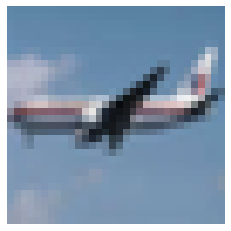

In [264]:
from tensorflow.keras.preprocessing import image

(_,_), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

img = test_images[8210]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

# https://www.tensorflow.org/tutorials/keras/classification
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

plt.imshow(img, cmap='viridis')
plt.axis('off')
#plt.title(class_names[test_labels[0]], fontsize=12)
plt.show()

In [265]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model4_reg.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model4_reg.input, outputs=layer_outputs)

In [266]:
activations = activation_model.predict(img_tensor)

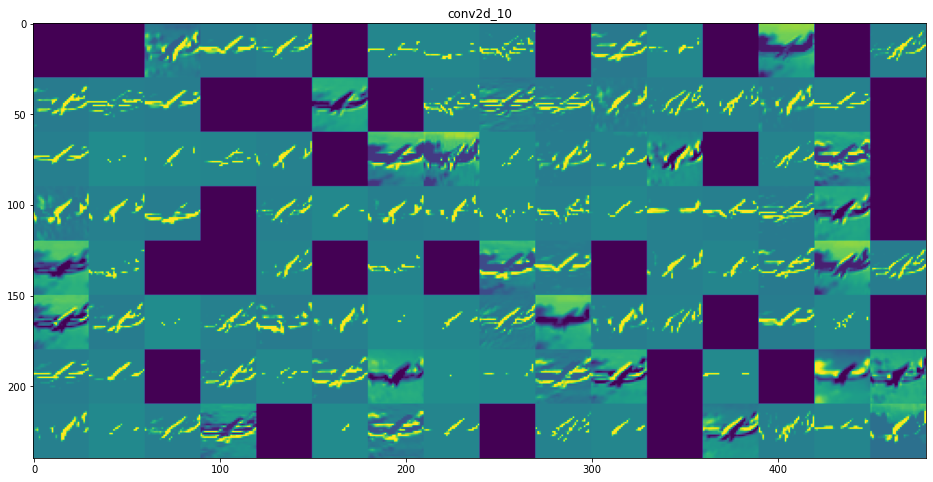

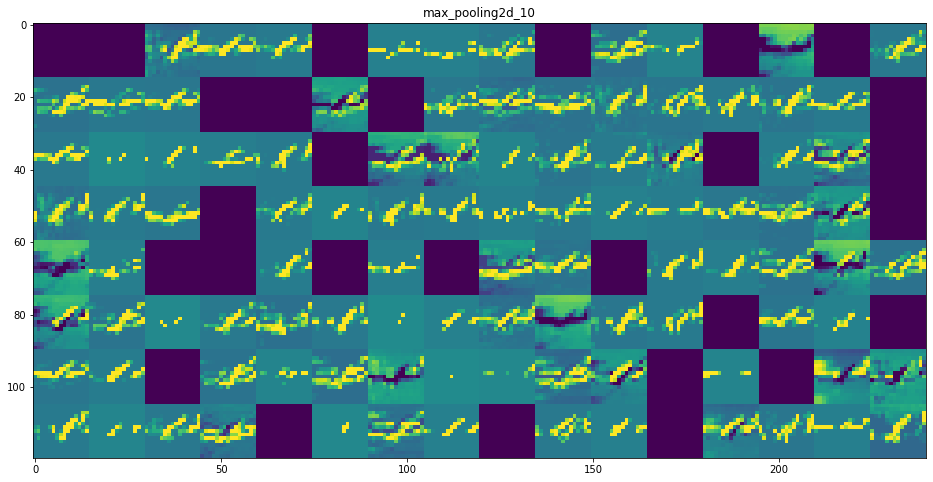

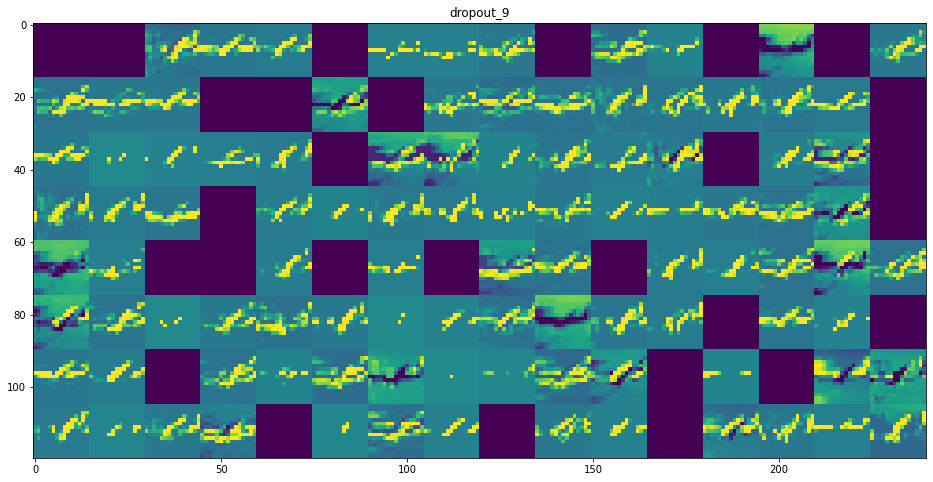

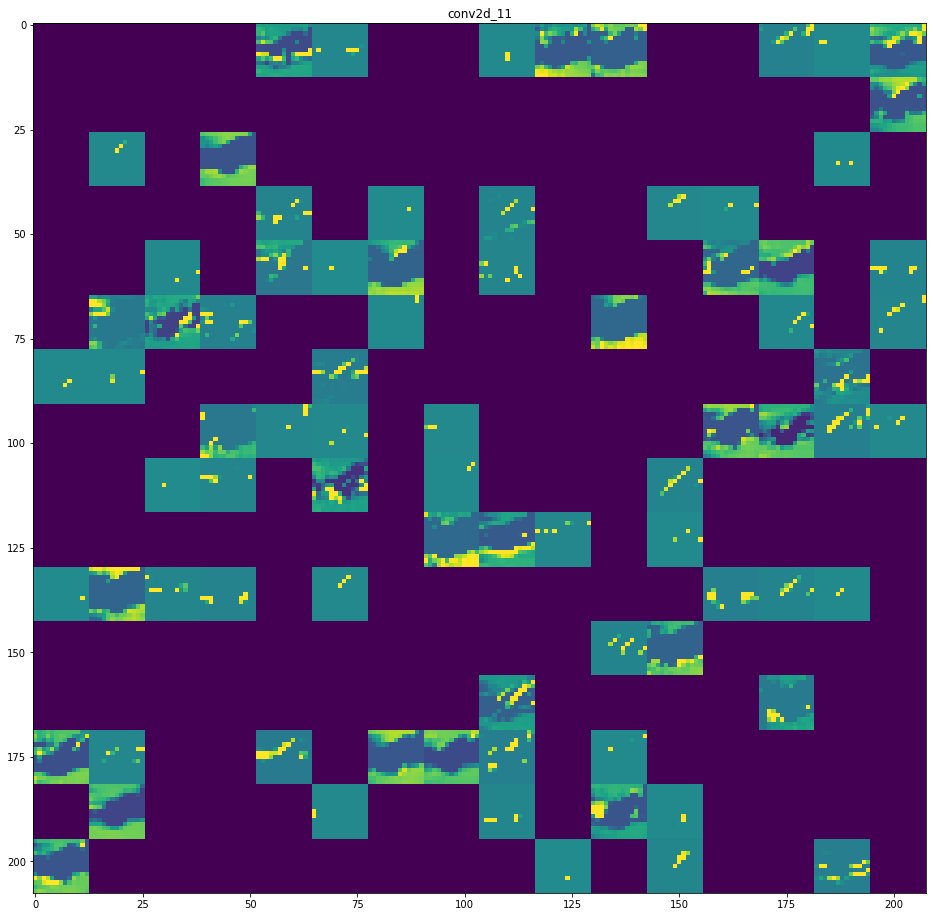

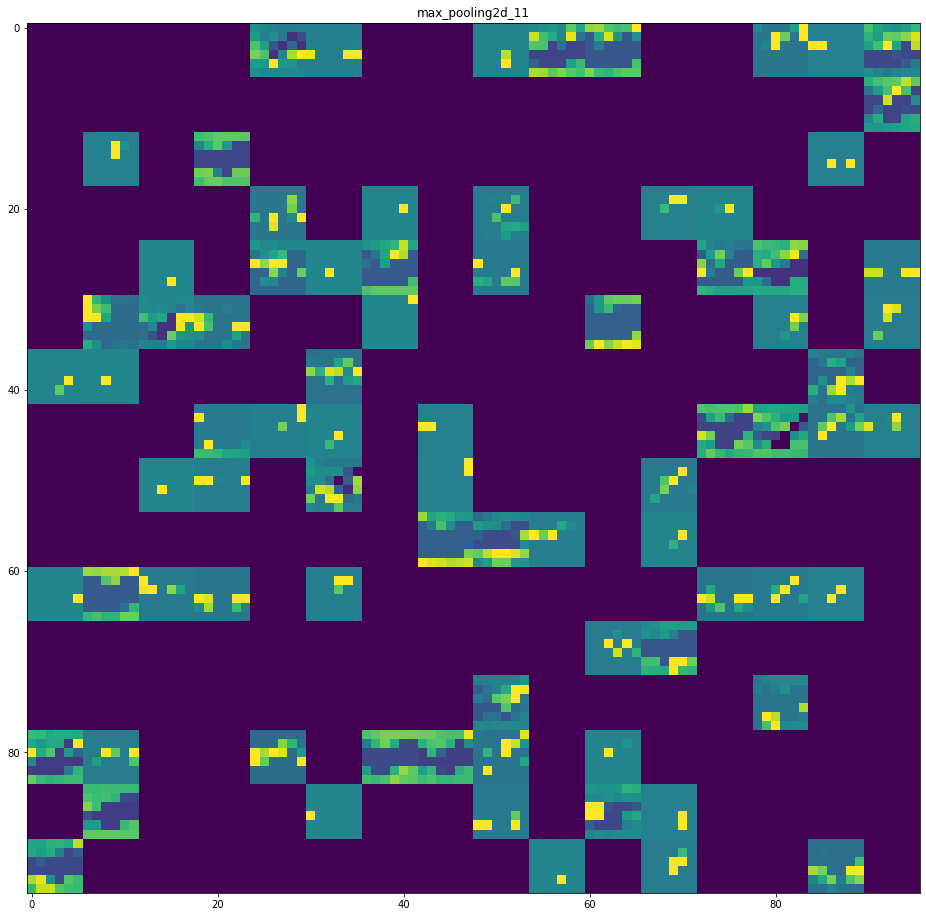

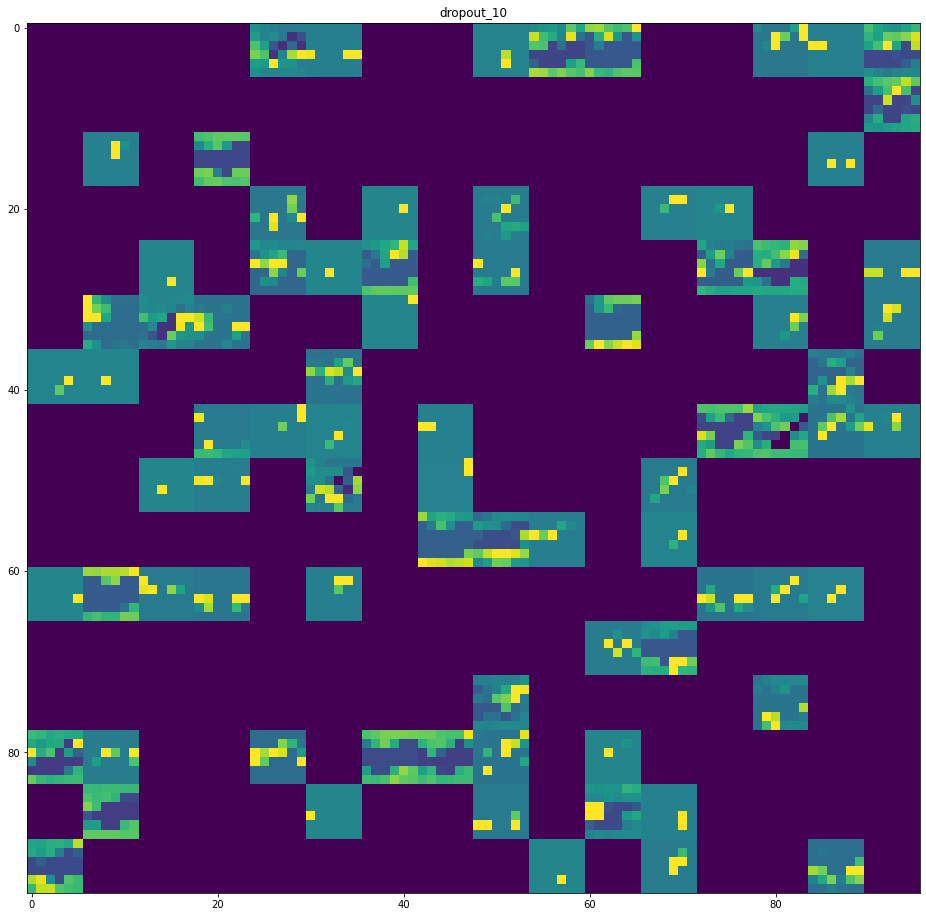

In [270]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model4_reg.layers[:6]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()